In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [158]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


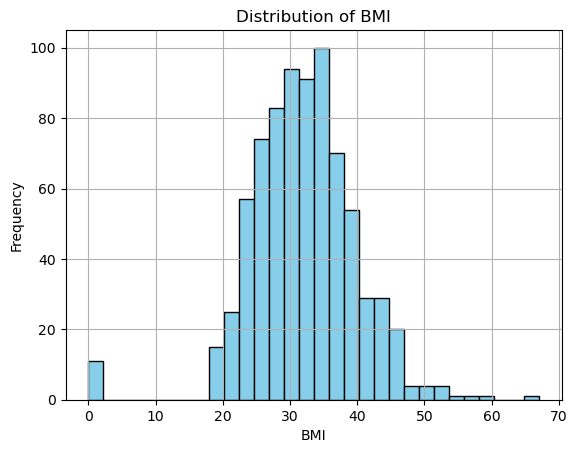

In [159]:
plt.hist(data["BMI"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [160]:
X = data.drop("BMI", axis=1)
y = data["BMI"]

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

In [161]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # 회귀이므로 활성화 함수 없음
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0505 - mae: 0.7585 - val_loss: 0.7771 - val_mae: 0.7333
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1119 - mae: 0.7611 - val_loss: 0.7581 - val_mae: 0.7232
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1281 - mae: 0.7495 - val_loss: 0.7409 - val_mae: 0.7145
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9363 - mae: 0.7011 - val_loss: 0.7264 - val_mae: 0.7070
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8888 - mae: 0.6842 - val_loss: 0.7131 - val_mae: 0.6993
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8810 - mae: 0.6931 - val_loss: 0.7008 - val_mae: 0.6921
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7715 - mae: 0.6509 - val_loss: 0.6893 - val_mae: 0.6853
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8563 - mae: 0.6564 - val_loss: 0.6799 - val_mae: 0.6795
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.976

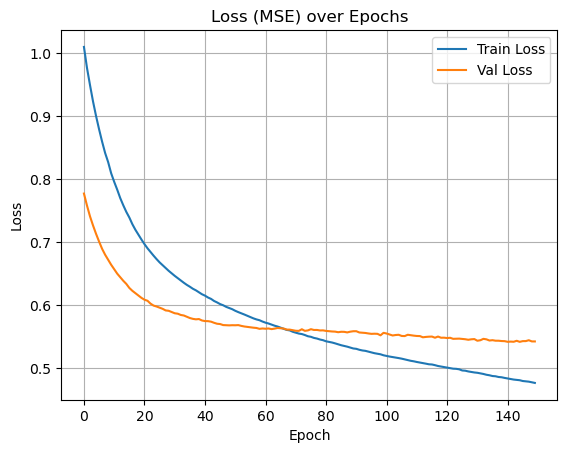

In [163]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss (MSE) over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [164]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MSE: 49.2376
MAE: 5.0386
R² Score: 0.3073


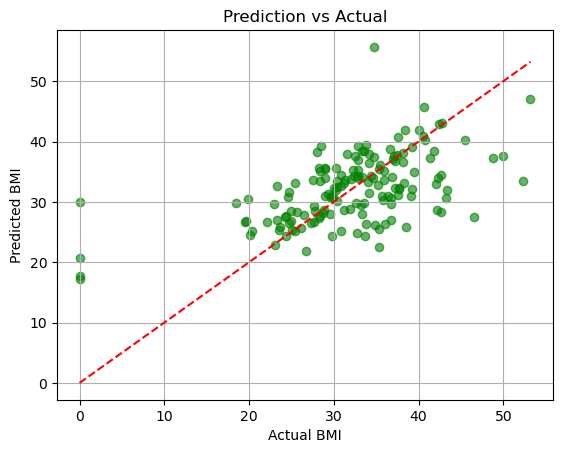

In [165]:
# 9. 예측 vs 실제 시각화
plt.scatter(y_true, y_pred, alpha=0.6, color='green')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Prediction vs Actual")
plt.grid(True)
plt.show()